In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import statsmodels.api as sm

color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
from subprocess import check_output


In [3]:
df = pd.read_csv("C:/Users/Hannah Kim/Documents/_실증분석연구회/pre_01.csv")
df

,Date,market_sam,closing_sam,yesterday_sam,high_sam,low_sam,volume_sam,price_du,closing_sp,open_sp,...,closing_sh,open_sh,high_sh,low_sh,volume_sh,price_kospi,yesterday_kospi,change_kospi,volume_kospi,money_kospi
0,2019-12-30,56200,55800,-700,56600,55700,8356767,64.85,3221.29,3240.09,...,3040.02,2998.17,3041.40,2983.34,24810000000,293.77,-1.43,-0.48,54972000,2.540000e+12
1,2019-12-27,55700,56500,1100,56900,55500,12313056,64.82,3240.02,3247.23,...,3005.04,3006.85,3036.11,3003.63,24710000000,295.20,1.14,0.39,77505000,3.600000e+12
2,2019-12-26,54700,55400,400,55400,54400,9645034,64.83,3239.91,3227.20,...,3007.35,2981.25,3007.35,2980.40,18240000000,294.06,1.16,0.40,68476000,3.210000e+12
3,2019-12-24,55600,55000,-500,55700,54800,11868463,64.79,3223.38,3225.45,...,2982.68,2965.83,2983.82,2960.68,16300000000,292.90,-1.97,-0.67,60605000,2.710000e+12
4,2019-12-23,56100,55500,-500,56400,55100,9839252,64.65,3224.01,3226.05,...,2962.75,2999.04,3009.34,2960.43,20570000000,294.87,-0.44,-0.15,62094000,2.900000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,2010-05-20,15300,15120,-17000,15440,15100,19790300,76.56,1071.59,1107.34,...,2555.94,2571.54,2609.64,2551.45,6640000000,208.78,-3.65,-1.72,112704000,4.990000e+12
2053,2010-05-19,15700,15460,-19000,15700,15380,18058550,77.09,1115.05,1119.57,...,2587.81,2581.63,2623.96,2554.98,7140000000,212.43,-1.99,-0.93,121619000,5.070000e+12
2054,2010-05-18,15800,15840,8000,15900,15680,18169250,77.27,1120.80,1138.78,...,2594.78,2555.14,2603.32,2529.62,8280000000,214.42,-0.94,-0.44,126438000,5.420000e+12
2055,2010-05-17,15960,15680,-26000,15980,15560,26529900,77.42,1136.94,1136.52,...,2559.93,2663.88,2663.88,2557.24,8260000000,215.36,-5.72,-2.59,136035000,5.690000e+12


In [4]:
df = df[::-1]

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

df.head()

,Date,market_sam,closing_sam,yesterday_sam,high_sam,low_sam,volume_sam,price_du,closing_sp,open_sp,...,closing_sh,open_sh,high_sh,low_sh,volume_sh,price_kospi,yesterday_kospi,change_kospi,volume_kospi,money_kospi
2056,2010-05-14,16120,16200,-3000,16240,15980,14692000,78.42,1135.68,1157.19,...,2696.63,2692.10,2712.86,2677.19,7340000000,221.08,0.28,0.13,118392000,5.130000e+12
2055,2010-05-17,15960,15680,-26000,15980,15560,26529900,77.42,1136.94,1136.52,...,2559.93,2663.88,2663.88,2557.24,8260000000,215.36,-5.72,-2.59,136035000,5.690000e+12
2054,2010-05-18,15800,15840,8000,15900,15680,18169250,77.27,1120.80,1138.78,...,2594.78,2555.14,2603.32,2529.62,8280000000,214.42,-0.94,-0.44,126438000,5.420000e+12
2053,2010-05-19,15700,15460,-19000,15700,15380,18058550,77.09,1115.05,1119.57,...,2587.81,2581.63,2623.96,2554.98,7140000000,212.43,-1.99,-0.93,121619000,5.070000e+12
2052,2010-05-20,15300,15120,-17000,15440,15100,19790300,76.56,1071.59,1107.34,...,2555.94,2571.54,2609.64,2551.45,6640000000,208.78,-3.65,-1.72,112704000,4.990000e+12


In [6]:
lst = []
for i in range(0,2057):
    lst.append( i)
lst

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [7]:
df['index'] = lst

In [8]:
df = df.set_index('index')

In [9]:
train_df = df

In [10]:
train_df

,Date,market_sam,closing_sam,yesterday_sam,high_sam,low_sam,volume_sam,price_du,closing_sp,open_sp,...,closing_sh,open_sh,high_sh,low_sh,volume_sh,price_kospi,yesterday_kospi,change_kospi,volume_kospi,money_kospi
index,,,,,,,,,,,,,,,,,,,,,
0,2010-05-14,16120,16200,-3000,16240,15980,14692000,78.42,1135.68,1157.19,...,2696.63,2692.10,2712.86,2677.19,7340000000,221.08,0.28,0.13,118392000,5.130000e+12
1,2010-05-17,15960,15680,-26000,15980,15560,26529900,77.42,1136.94,1136.52,...,2559.93,2663.88,2663.88,2557.24,8260000000,215.36,-5.72,-2.59,136035000,5.690000e+12
2,2010-05-18,15800,15840,8000,15900,15680,18169250,77.27,1120.80,1138.78,...,2594.78,2555.14,2603.32,2529.62,8280000000,214.42,-0.94,-0.44,126438000,5.420000e+12
3,2010-05-19,15700,15460,-19000,15700,15380,18058550,77.09,1115.05,1119.57,...,2587.81,2581.63,2623.96,2554.98,7140000000,212.43,-1.99,-0.93,121619000,5.070000e+12
4,2010-05-20,15300,15120,-17000,15440,15100,19790300,76.56,1071.59,1107.34,...,2555.94,2571.54,2609.64,2551.45,6640000000,208.78,-3.65,-1.72,112704000,4.990000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,2019-12-23,56100,55500,-500,56400,55100,9839252,64.65,3224.01,3226.05,...,2962.75,2999.04,3009.34,2960.43,20570000000,294.87,-0.44,-0.15,62094000,2.900000e+12
2053,2019-12-24,55600,55000,-500,55700,54800,11868463,64.79,3223.38,3225.45,...,2982.68,2965.83,2983.82,2960.68,16300000000,292.90,-1.97,-0.67,60605000,2.710000e+12
2054,2019-12-26,54700,55400,400,55400,54400,9645034,64.83,3239.91,3227.20,...,3007.35,2981.25,3007.35,2980.40,18240000000,294.06,1.16,0.40,68476000,3.210000e+12


https://byeongkijeong.github.io/ARIMA-with-Python/

https://www.kaggle.com/sumi25/understand-arima-and-tune-p-d-q 참조

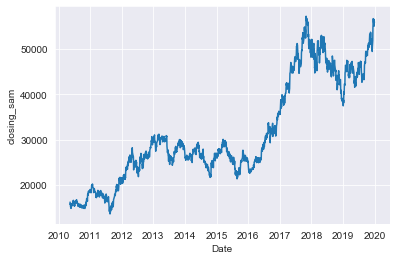

In [11]:
sns.lineplot(x = 'Date', y = 'closing_sam', legend = 'full', data = train_df)

<Figure size 432x288 with 0 Axes>

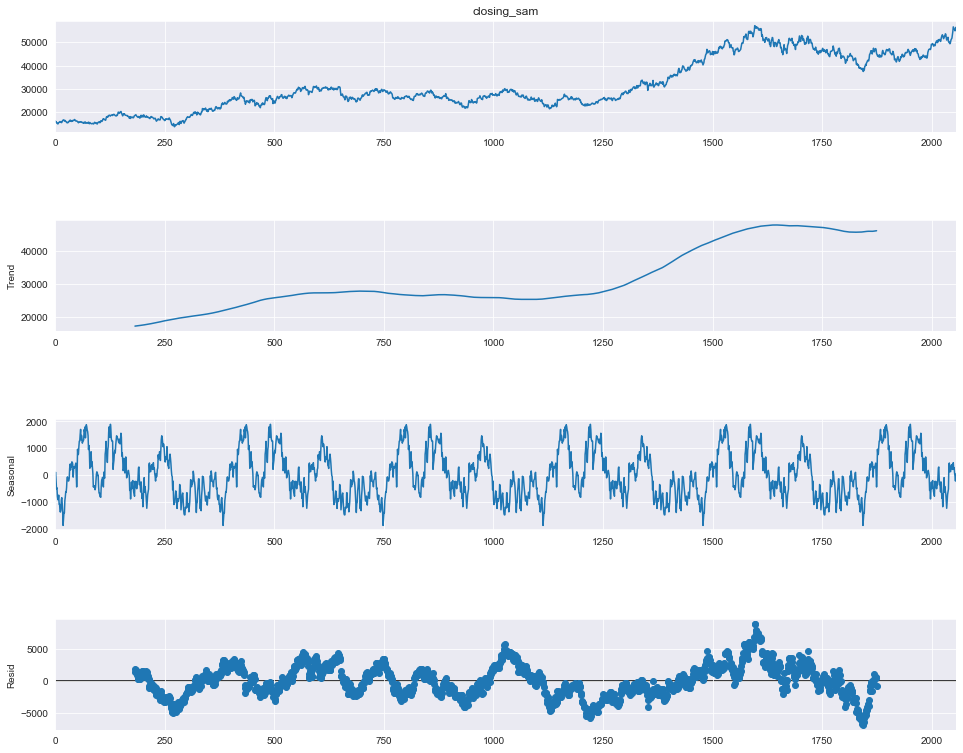

In [12]:
#seasonality 확인
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_df['closing_sam'], model='additive', freq=365)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)      

In [13]:
#testing stationarity - Dickey Fuller Test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag ='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

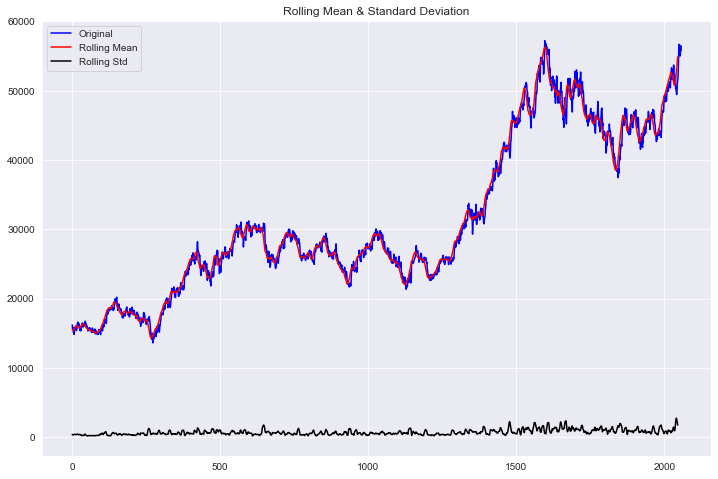

Results of Dickey-Fuller Test:
p-value = 0.5695. The series is likely non-stationary.
Test Statistic                   -1.426597
p-value                           0.569461
#Lags Used                       10.000000
Number of Observations Used    2046.000000
Critical Value (1%)              -3.433550
Critical Value (5%)              -2.862954
Critical Value (10%)             -2.567523
dtype: float64


In [14]:
test_stationarity(train_df['closing_sam'][::-1]) #뒤집힘..ㅠ

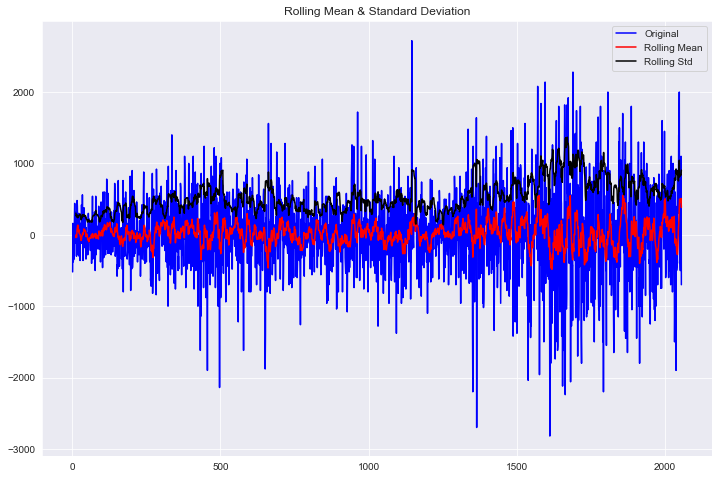

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.708612e+01
p-value                        7.647214e-30
#Lags Used                     7.000000e+00
Number of Observations Used    2.048000e+03
Critical Value (1%)           -3.433547e+00
Critical Value (5%)           -2.862952e+00
Critical Value (10%)          -2.567522e+00
dtype: float64


In [15]:
#differencing 차분
first_diff = train_df.closing_sam - train_df.closing_sam.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

차분 한번 더 했는데 필요 없을것 같네용

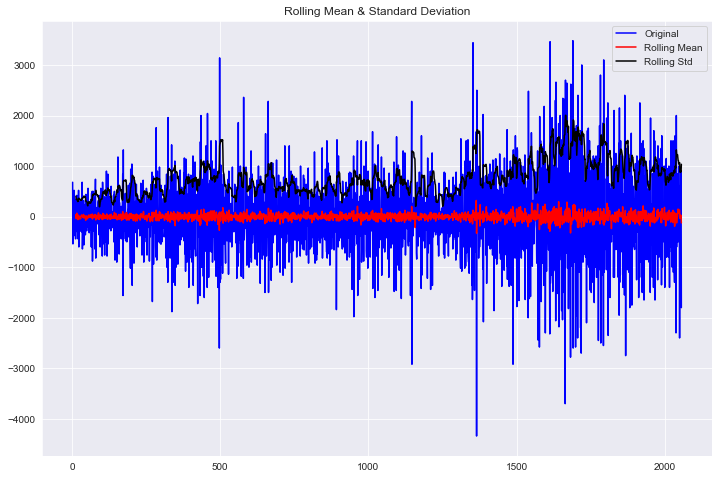

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.829637e+01
p-value                        2.291552e-30
#Lags Used                     1.800000e+01
Number of Observations Used    2.036000e+03
Critical Value (1%)           -3.433566e+00
Critical Value (5%)           -2.862961e+00
Critical Value (10%)          -2.567526e+00
dtype: float64


In [16]:
#differencing 2 times 
second_diff = (train_df.closing_sam - train_df.closing_sam.shift(1)) - (train_df.closing_sam.shift(1) - train_df.closing_sam.shift(2))

second_diff = second_diff.dropna(inplace = False)
test_stationarity(second_diff, window = 12)

differencing 1번 -> d = 1 

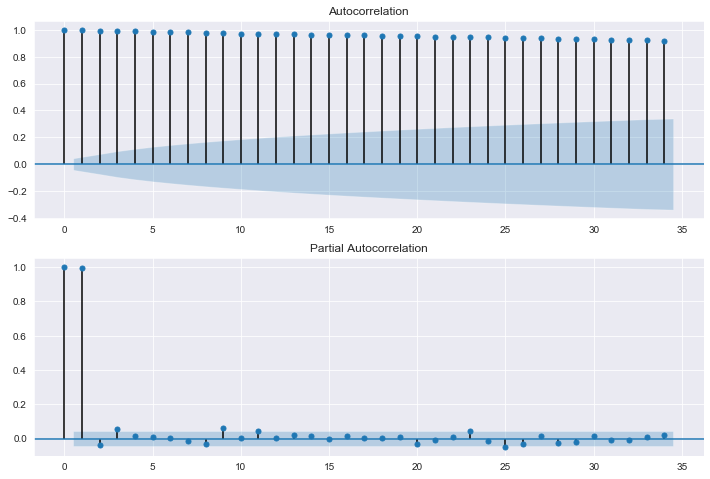

In [17]:
#ACF and PACF

import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df.closing_sam,  ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df.closing_sam,  ax=ax2)# , lags 는 알아서 지정하도록

차분한 것에 대한 ACF 와 PACF, 딱히 유의미한 정보가 없네요ㅠ

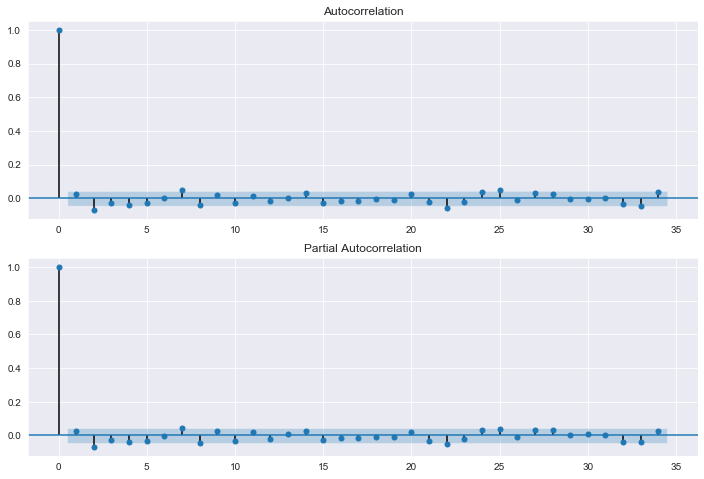

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff,ax=ax2)

In [19]:
#d = 1, p = 1 , q = 1 로 아리마 진행하였습니다. 
arima_mod6 = sm.tsa.ARIMA(train_df.closing_sam, (1,1,1)).fit(disp=False)
print(arima_mod6.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.closing_sam   No. Observations:                 2056
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -15984.285
Method:                       css-mle   S.D. of innovations            575.659
Date:                Wed, 29 Jul 2020   AIC                          31976.569
Time:                        23:50:46   BIC                          31999.083
Sample:                             1   HQIC                         31984.824
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  19.2347     12.949      1.485      0.137      -6.145      44.614
ar.L1.D.closing_sam    -0.8290      0.071    -11.740      0.000      -0.967      -0.691
ma.L1.D.closing_

NormaltestResult(statistic=110.31813635310152, pvalue=1.1084626499790397e-24)


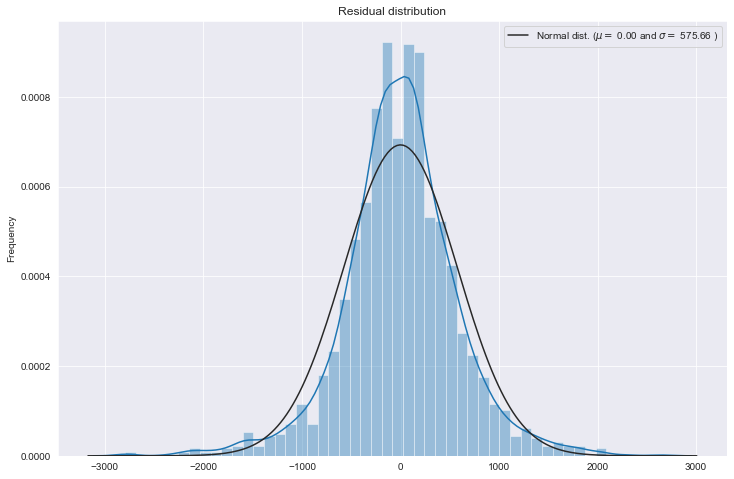

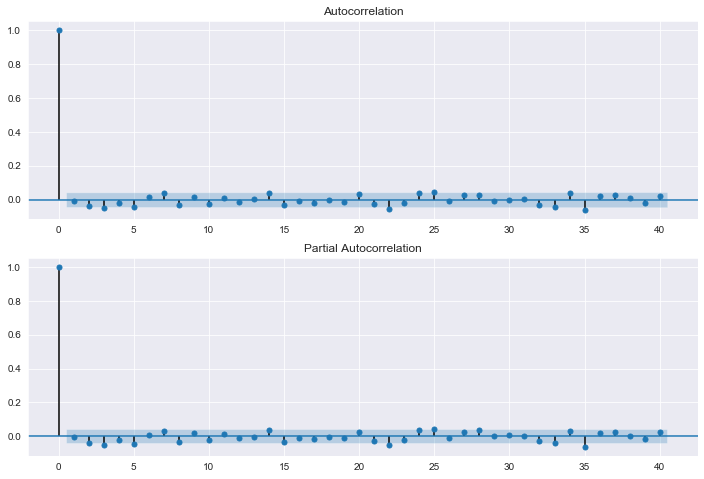

In [20]:
from scipy import stats
from scipy.stats import normaltest

resid = arima_mod6.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod6.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod6.resid, lags=40, ax=ax2)

# SARIMA  모델

In [21]:
#SARIMA - seasonality distribution

In [60]:
sarima_mod6 = sm.tsa.statespace.SARIMAX(train_df.closing_sam, trend='n', order=(2,2,1)).fit()
print(sarima_mod6.summary())

                               SARIMAX Results                                
Dep. Variable:            closing_sam   No. Observations:                 2057
Model:               SARIMAX(2, 2, 1)   Log Likelihood              -15990.445
Date:                Thu, 30 Jul 2020   AIC                          31988.891
Time:                        01:11:19   BIC                          32011.403
Sample:                             0   HQIC                         31997.146
                               - 2057                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0394      0.017      2.287      0.022       0.006       0.073
ar.L2         -0.0667      0.018     -3.766      0.000      -0.101      -0.032
ma.L1         -1.0000      0.022    -46.394      0.0

NormaltestResult(statistic=2303.444352027885, pvalue=0.0)


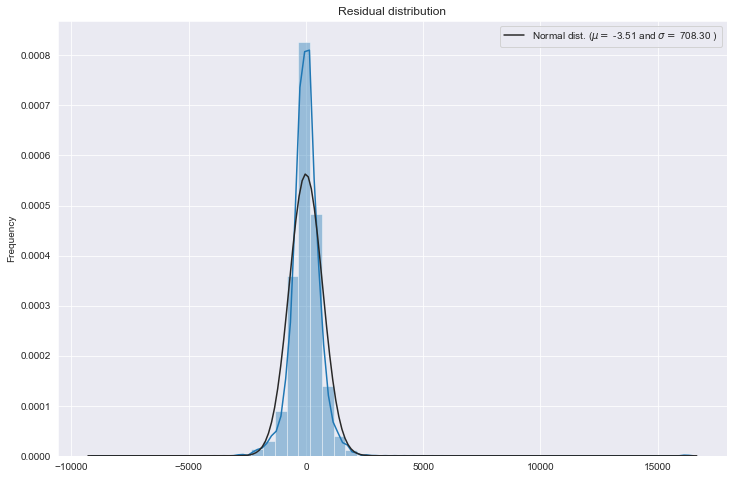

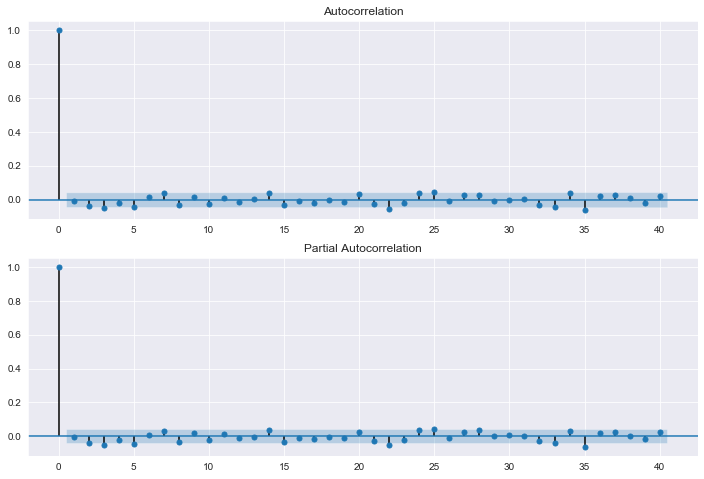

In [61]:
resid = sarima_mod6.resid
print(normaltest(resid))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod6.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod6.resid, lags=40, ax=ax2)

Making Prediction and Model Evaluation을 위해 그냥 랜덤한 인덱스 값들 대입해서 테스트 해봤습니다. 

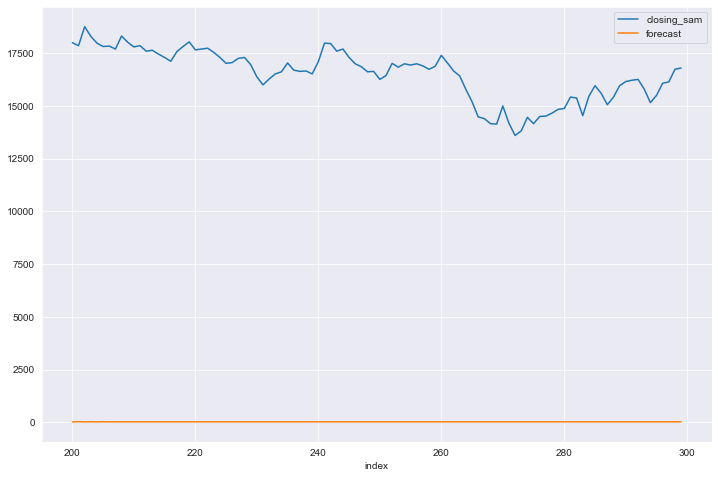

In [62]:
start_index = 200#index 랜덤한 넘버
end_index = 300
train_df['forecast'] = arima_mod6.predict(start = start_index, end= end_index, dynamic= True)  
train_df[start_index:end_index][['closing_sam', 'forecast']].plot(figsize=(12, 8))

In [63]:
def smape_kun(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    smape = np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))).fillna(0))
    print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")

In [64]:
smape_kun(train_df[1730:1825]['closing_sam'],train_df[1730:1825]['forecast'])
#아무것도 맞추지를 못하네요ㅠ

MAPE: nan % 
SMAPE: 0.00 %


In [65]:
train_df.tail()

,Date,market_sam,closing_sam,yesterday_sam,high_sam,low_sam,volume_sam,price_du,closing_sp,open_sp,...,high_sh,low_sh,volume_sh,price_kospi,yesterday_kospi,change_kospi,volume_kospi,money_kospi,forecast,forcast
index,,,,,,,,,,,,,,,,,,,,,
2052,2019-12-23,56100,55500,-500,56400,55100,9839252,64.65,3224.01,3226.05,...,3009.34,2960.43,20570000000,294.87,-0.44,-0.15,62094000,2.900000e+12,NaN,NaN
2053,2019-12-24,55600,55000,-500,55700,54800,11868463,64.79,3223.38,3225.45,...,2983.82,2960.68,16300000000,292.90,-1.97,-0.67,60605000,2.710000e+12,NaN,NaN
2054,2019-12-26,54700,55400,400,55400,54400,9645034,64.83,3239.91,3227.20,...,3007.35,2980.40,18240000000,294.06,1.16,0.40,68476000,3.210000e+12,NaN,NaN
2055,2019-12-27,55700,56500,1100,56900,55500,12313056,64.82,3240.02,3247.23,...,3036.11,3003.63,24710000000,295.20,1.14,0.39,77505000,3.600000e+12,NaN,NaN
2056,2019-12-30,56200,55800,-700,56600,55700,8356767,64.85,3221.29,3240.09,...,3041.40,2983.34,24810000000,293.77,-1.43,-0.48,54972000,2.540000e+12,NaN,56559.104823


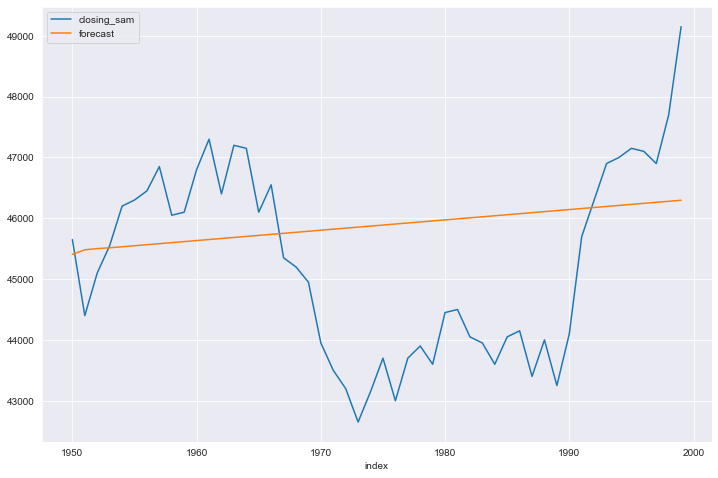

In [66]:
start_index = 1950
end_index = 2000
train_df['forecast'] = sarima_mod6.predict(start = start_index, end= end_index, dynamic= True)  
train_df[start_index:end_index][['closing_sam', 'forecast']].plot(figsize=(12, 8))

In [67]:
train_df.tail()

,Date,market_sam,closing_sam,yesterday_sam,high_sam,low_sam,volume_sam,price_du,closing_sp,open_sp,...,high_sh,low_sh,volume_sh,price_kospi,yesterday_kospi,change_kospi,volume_kospi,money_kospi,forecast,forcast
index,,,,,,,,,,,,,,,,,,,,,
2052,2019-12-23,56100,55500,-500,56400,55100,9839252,64.65,3224.01,3226.05,...,3009.34,2960.43,20570000000,294.87,-0.44,-0.15,62094000,2.900000e+12,NaN,NaN
2053,2019-12-24,55600,55000,-500,55700,54800,11868463,64.79,3223.38,3225.45,...,2983.82,2960.68,16300000000,292.90,-1.97,-0.67,60605000,2.710000e+12,NaN,NaN
2054,2019-12-26,54700,55400,400,55400,54400,9645034,64.83,3239.91,3227.20,...,3007.35,2980.40,18240000000,294.06,1.16,0.40,68476000,3.210000e+12,NaN,NaN
2055,2019-12-27,55700,56500,1100,56900,55500,12313056,64.82,3240.02,3247.23,...,3036.11,3003.63,24710000000,295.20,1.14,0.39,77505000,3.600000e+12,NaN,NaN
2056,2019-12-30,56200,55800,-700,56600,55700,8356767,64.85,3221.29,3240.09,...,3041.40,2983.34,24810000000,293.77,-1.43,-0.48,54972000,2.540000e+12,NaN,56559.104823


In [68]:
prelst = []
start_index = 2058
for i in range(0, 10):
    end_index = start_index
    pre = sarima_mod6.predict(start = start_index, end= end_index, dynamic= True) 
    prelst.append(pre)
    start_index += 1
prelst

C:\Users\Hannah Kim\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)
C:\Users\Hannah Kim\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)
C:\Users\Hannah Kim\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)
C:\Users\Hannah Kim\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)
C:\Users\Hannah Kim\anaconda3\lib\si

[2058    55785.97393
 dtype: float64,
 2059    55815.53183
 dtype: float64,
 2060    55834.031418
 dtype: float64,
 2061    55854.479576
 dtype: float64,
 2062    55875.742566
 dtype: float64,
 2063    55896.90762
 dtype: float64,
 2064    55918.014433
 dtype: float64,
 2065    55939.125487
 dtype: float64,
 2066    55960.240595
 dtype: float64,
 2067    55981.355579
 dtype: float64]

In [69]:
predicted = [55785.97393,55815.53183,55834.031418,55854.479576,55875.742566,55896.90762,55918.014433,55939.125487,55960.240595,55981.355579]

In [70]:
date_pre = ['2020-01-15',
'2020-01-14',
'2020-01-13',
'2020-01-10',
'2020-01-09',
'2020-01-08',
'2020-01-07',
'2020-01-06',
'2020-01-03',
'2020-01-02' ]
date_pre = date_pre[::-1]

In [71]:
real= np.array([59000,
60000,
60000,
59500,
58600,
56800,
55800,
55500,
55500,
55200])
real = real[::-1]

In [72]:
result_df = pd.DataFrame({'predicted': predicted ,'real': real, 'date': date_pre})

result_df['date'] = pd.to_datetime(result_df['date'], format="%Y-%m-%d")
result_df.set_index('date')

,predicted,real
date,,
2020-01-02,55785.973930,55200
2020-01-03,55815.531830,55500
2020-01-06,55834.031418,55500
2020-01-07,55854.479576,55800
2020-01-08,55875.742566,56800
2020-01-09,55896.907620,58600
2020-01-10,55918.014433,59500
2020-01-13,55939.125487,60000
2020-01-14,55960.240595,60000


In [76]:
result_df.predicted

0    55785.973930
1    55815.531830
2    55834.031418
3    55854.479576
4    55875.742566
5    55896.907620
6    55918.014433
7    55939.125487
8    55960.240595
9    55981.355579
Name: predicted, dtype: float64

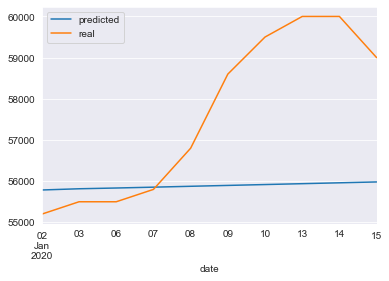

In [73]:
result_df.plot(x='date', y=['predicted', 'real'])

In [74]:
def smape_kun(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    smape = np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))
    print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")

In [75]:
y_true= real
y_pred = predicted
smape_kun(y_true, y_pred)

MAPE: 3.32 % 
SMAPE: 3.41 %


In [28]:
smape_kun(train_df[1950:2000]['closing_sam'],train_df[1950:2000]['forecast'])
#SARIMA 모델은 그나마..? 낫습니다..

MAPE: 3.03 % 
SMAPE: 3.02 %
